In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline

# Завантаження та підготовка датасету

In [78]:
db_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", 
         "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
         "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email",
         "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
         "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
         "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
         "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", 
         "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
         "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
         "capital_run_length_longest", "capital_run_length_total", "class"]

In [79]:
df = pd.read_csv("spambase_lab_csv.csv")
df.columns = db_names
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [59]:
df.shape

(4601, 58)

In [47]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [48]:
df.dropna(inplace = True)

In [400]:
features = df.iloc[:,0:-1]
labels = df.iloc[:,-1]

In [402]:
features

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [403]:
labels

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64

# Візуалізація даних

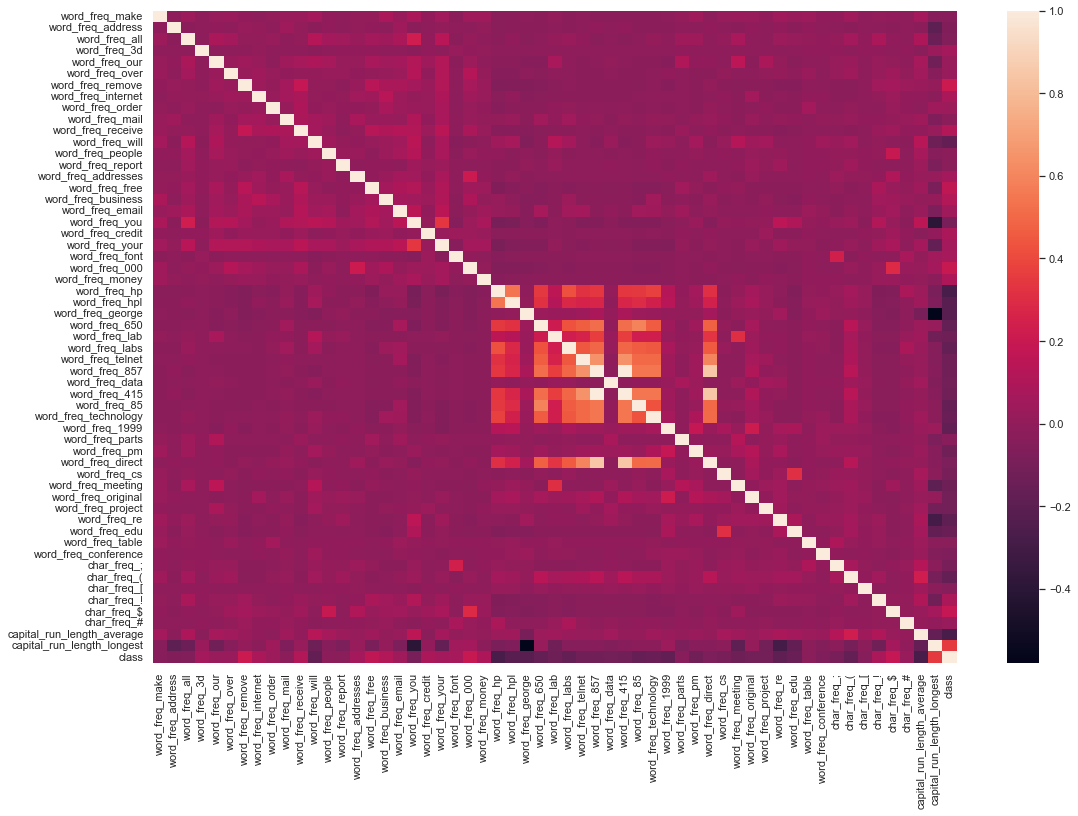

In [404]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_n.corr());

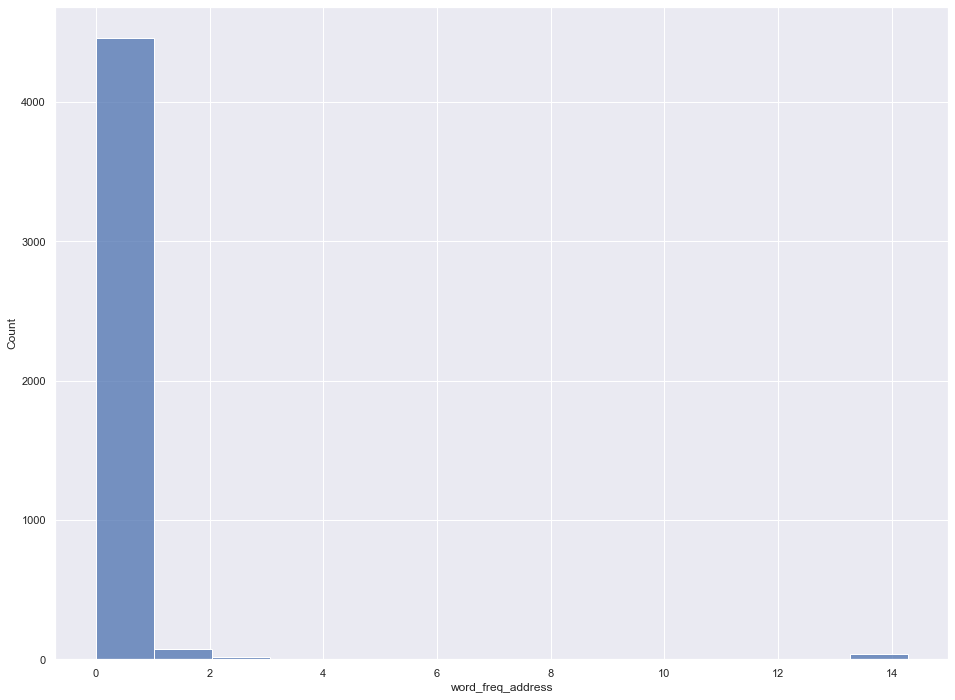

In [423]:
plt.figure(figsize=(16, 12))
sns.histplot(x='word_freq_address', data=df);

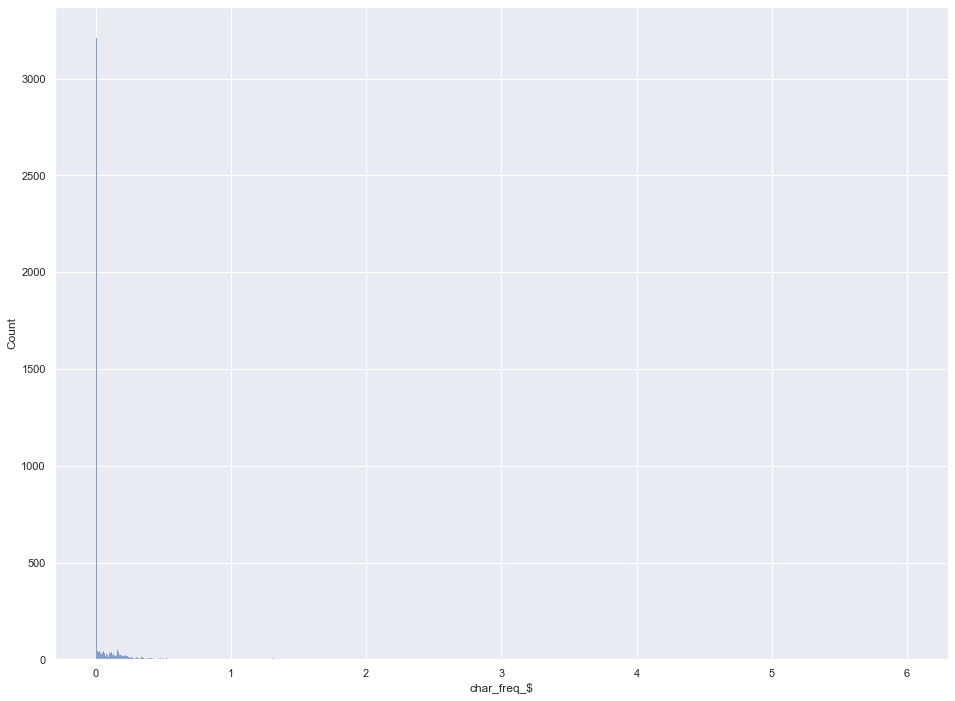

In [422]:
plt.figure(figsize=(16, 12))
sns.histplot(x='char_freq_$', data=df);

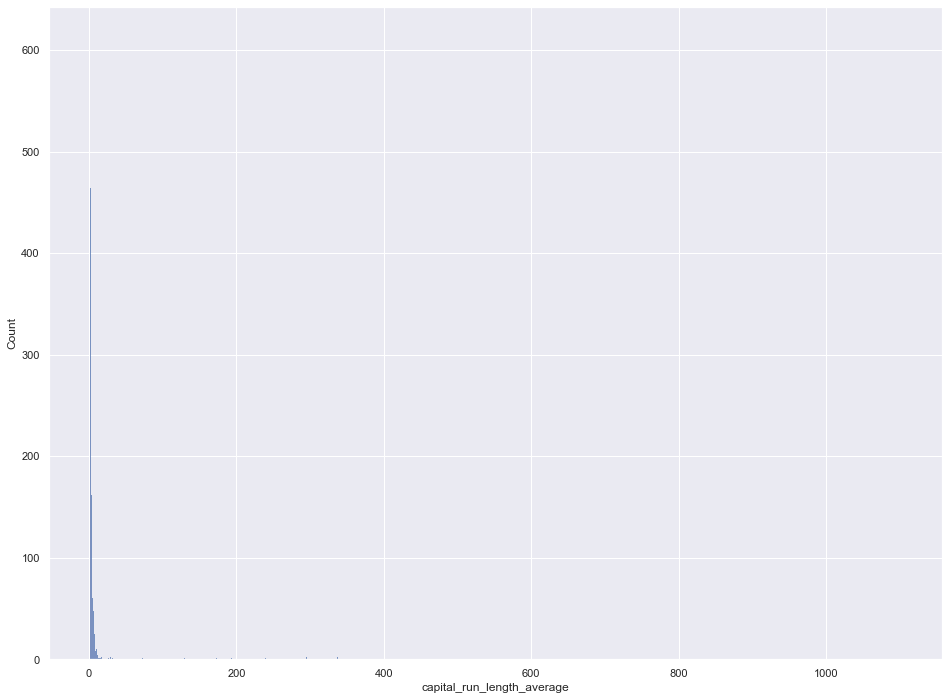

In [421]:
plt.figure(figsize=(16, 12))
sns.histplot(x='capital_run_length_average', data=df);

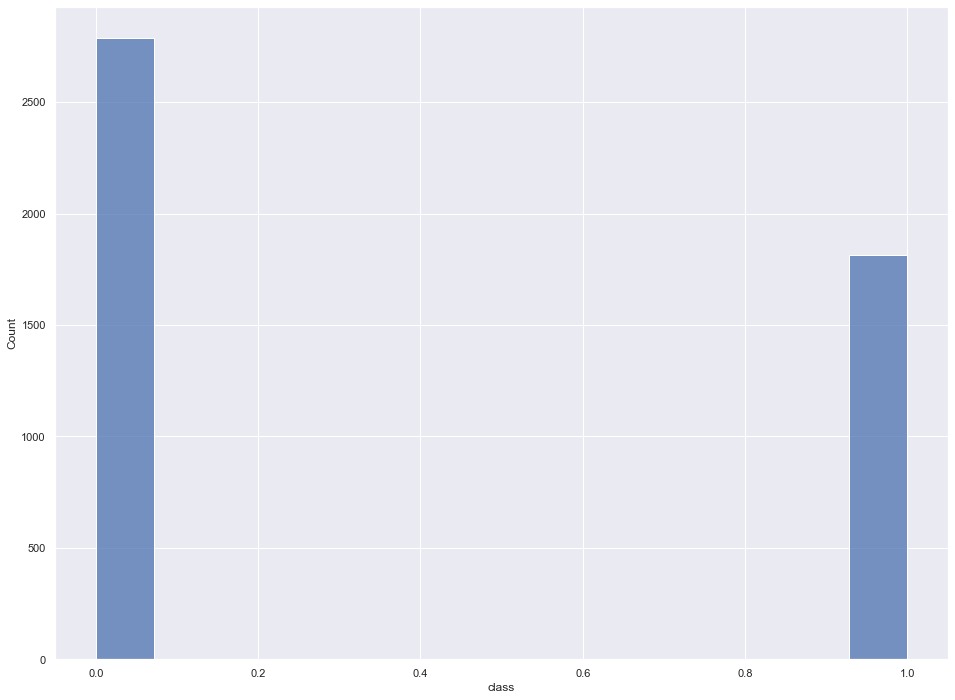

In [420]:
plt.figure(figsize=(16, 12))
sns.histplot(x='class', data=df);

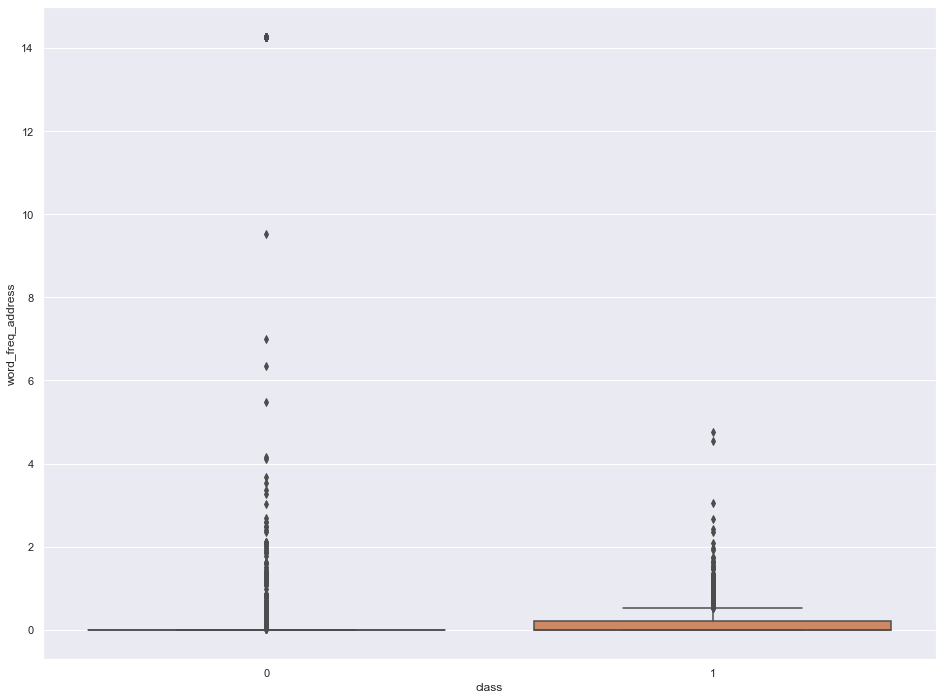

In [419]:
plt.figure(figsize=(16, 12))
sns.boxplot(x='class',y='word_freq_address',data=df);

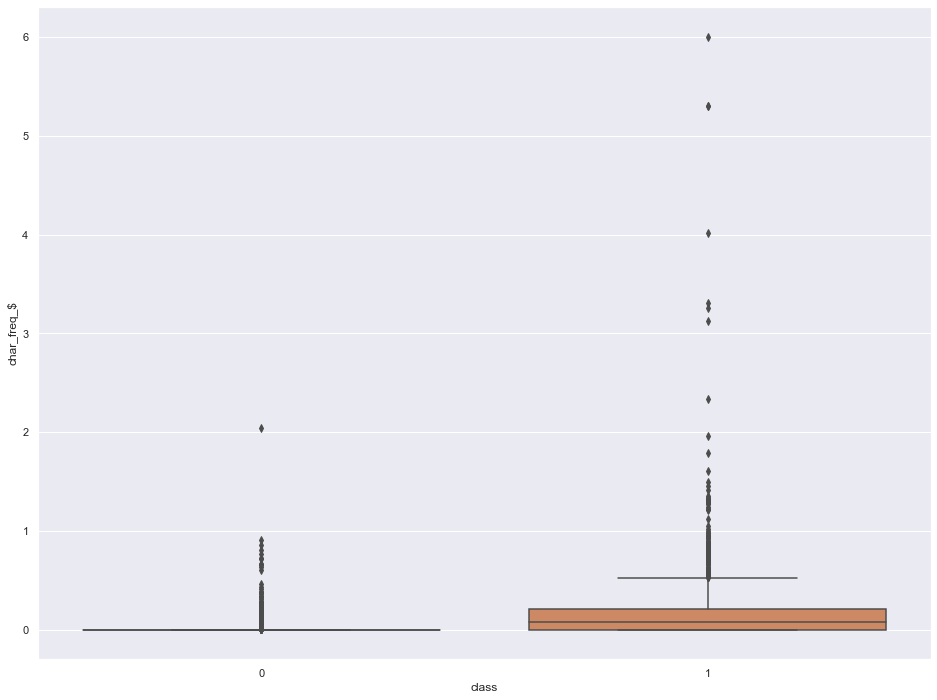

In [418]:
plt.figure(figsize=(16, 12))
sns.boxplot(x='class',y='char_freq_$',data=df);

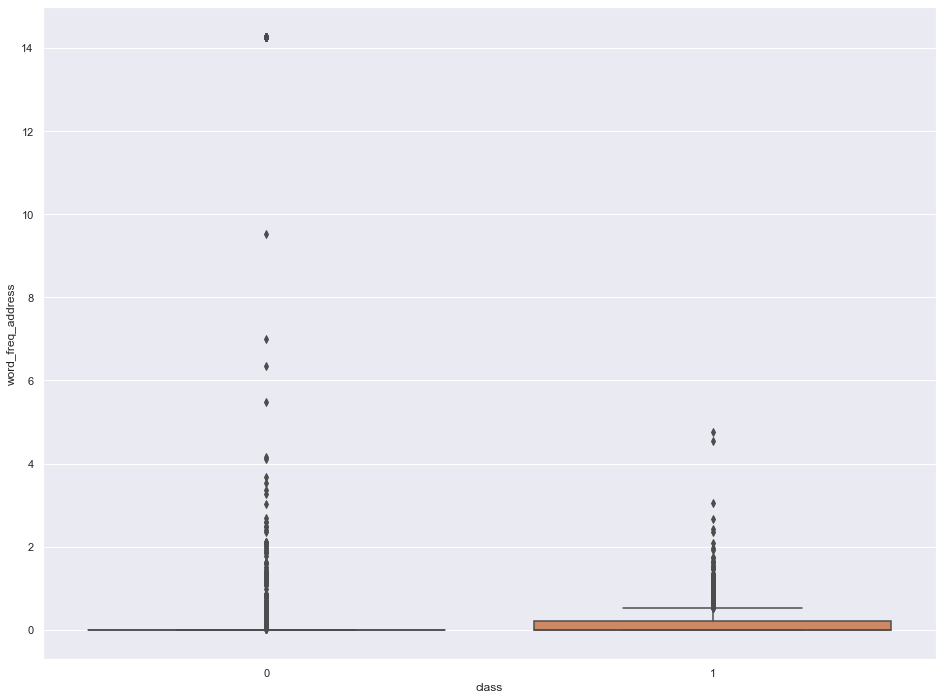

In [417]:
plt.figure(figsize=(16, 12))
sns.boxplot(x='class',y='word_freq_address',data=df);

# Нормалізація даних

In [459]:
df_n = preprocessing.normalize(features)
df_n = pd.DataFrame(df_n, columns=features.columns)
df_n['class'] = labels
df_n.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.000000,0.002248,0.002248,0.0,0.001124,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.002733,0.000000,0.000000,0.013195,0.214296,0.976627,1
1,0.000203,0.000271,0.000484,0.0,0.000136,0.000271,0.000203,0.000068,0.000000,0.000910,...,0.000000,0.000128,0.0,0.000360,0.000174,0.000046,0.004951,0.097776,0.995188,1
2,0.000026,0.000000,0.000307,0.0,0.000532,0.000082,0.000082,0.000052,0.000277,0.000108,...,0.000004,0.000062,0.0,0.000119,0.000080,0.000004,0.004251,0.209911,0.977710,1
3,0.000000,0.000000,0.000000,0.0,0.003227,0.000000,0.001588,0.003227,0.001588,0.003227,...,0.000000,0.000702,0.0,0.000702,0.000000,0.000000,0.018119,0.204911,0.978452,1
4,0.000000,0.000000,0.000000,0.0,0.003227,0.000000,0.001588,0.003227,0.001588,0.003227,...,0.000000,0.000692,0.0,0.000692,0.000000,0.000000,0.018119,0.204911,0.978452,1


# kNN

In [432]:
X_train, X_test, y_train, y_test = train_test_split(df_n.iloc[:,0:-1], labels, test_size = 0.25, random_state = 0)

In [433]:
knn_accuracy_dict = {}

for n in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    knn_accuracy_dict[n] = accuracy

In [434]:
knn_accuracy_dict

{1: 0.8653344917463076,
 2: 0.8479582971329279,
 3: 0.8479582971329279,
 4: 0.8488271068635969,
 5: 0.8279756733275413,
 6: 0.8323197219808862,
 7: 0.8201563857515204,
 8: 0.8192875760208514,
 9: 0.8149435273675065,
 10: 0.8210251954821894,
 11: 0.8114682884448305,
 12: 0.8097306689834927,
 13: 0.7984361424847958,
 14: 0.8079930495221547,
 15: 0.7984361424847958,
 16: 0.8105994787141616,
 17: 0.8071242397914856,
 18: 0.8027801911381407,
 19: 0.8088618592528236,
 20: 0.8019113814074718,
 21: 0.7984361424847958,
 22: 0.8019113814074718,
 23: 0.7993049522154648,
 24: 0.8027801911381407,
 25: 0.7949609035621199,
 26: 0.8001737619461338,
 27: 0.788879235447437,
 28: 0.788879235447437,
 29: 0.7819287576020851}

In [435]:
print(f'Кількість сусідів яка дає найбільшу точність: {sorted(knn_accuracy_dict, key=knn_accuracy_dict.get, reverse=True)[0]}')

Кількість сусідів яка дає найбільшу точність: 1


In [436]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Acuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Classification Report: \n', classification_report(y_test, y_pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Acuracy: 86.53%
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       691
           1       0.81      0.86      0.84       460

    accuracy                           0.87      1151
   macro avg       0.86      0.86      0.86      1151
weighted avg       0.87      0.87      0.87      1151

Confusion Matrix: 
 [[600  91]
 [ 64 396]]


# Дерево прийняття рішень

In [440]:
dtree_accuracy_dict = {}

for n in range(1, 15):
    decision_tree = tree.DecisionTreeClassifier(max_depth = n)
    decision_tree = decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    dtree_accuracy_dict[n] = accuracy

dtree_accuracy_dict

{1: 0.7688966116420504,
 2: 0.8357949609035621,
 3: 0.8357949609035621,
 4: 0.8653344917463076,
 5: 0.893136403127715,
 6: 0.9061685490877498,
 7: 0.9087749782797567,
 8: 0.9070373588184187,
 9: 0.9122502172024327,
 10: 0.9096437880104257,
 11: 0.9096437880104257,
 12: 0.9122502172024327,
 13: 0.894874022589053,
 14: 0.9122502172024327}

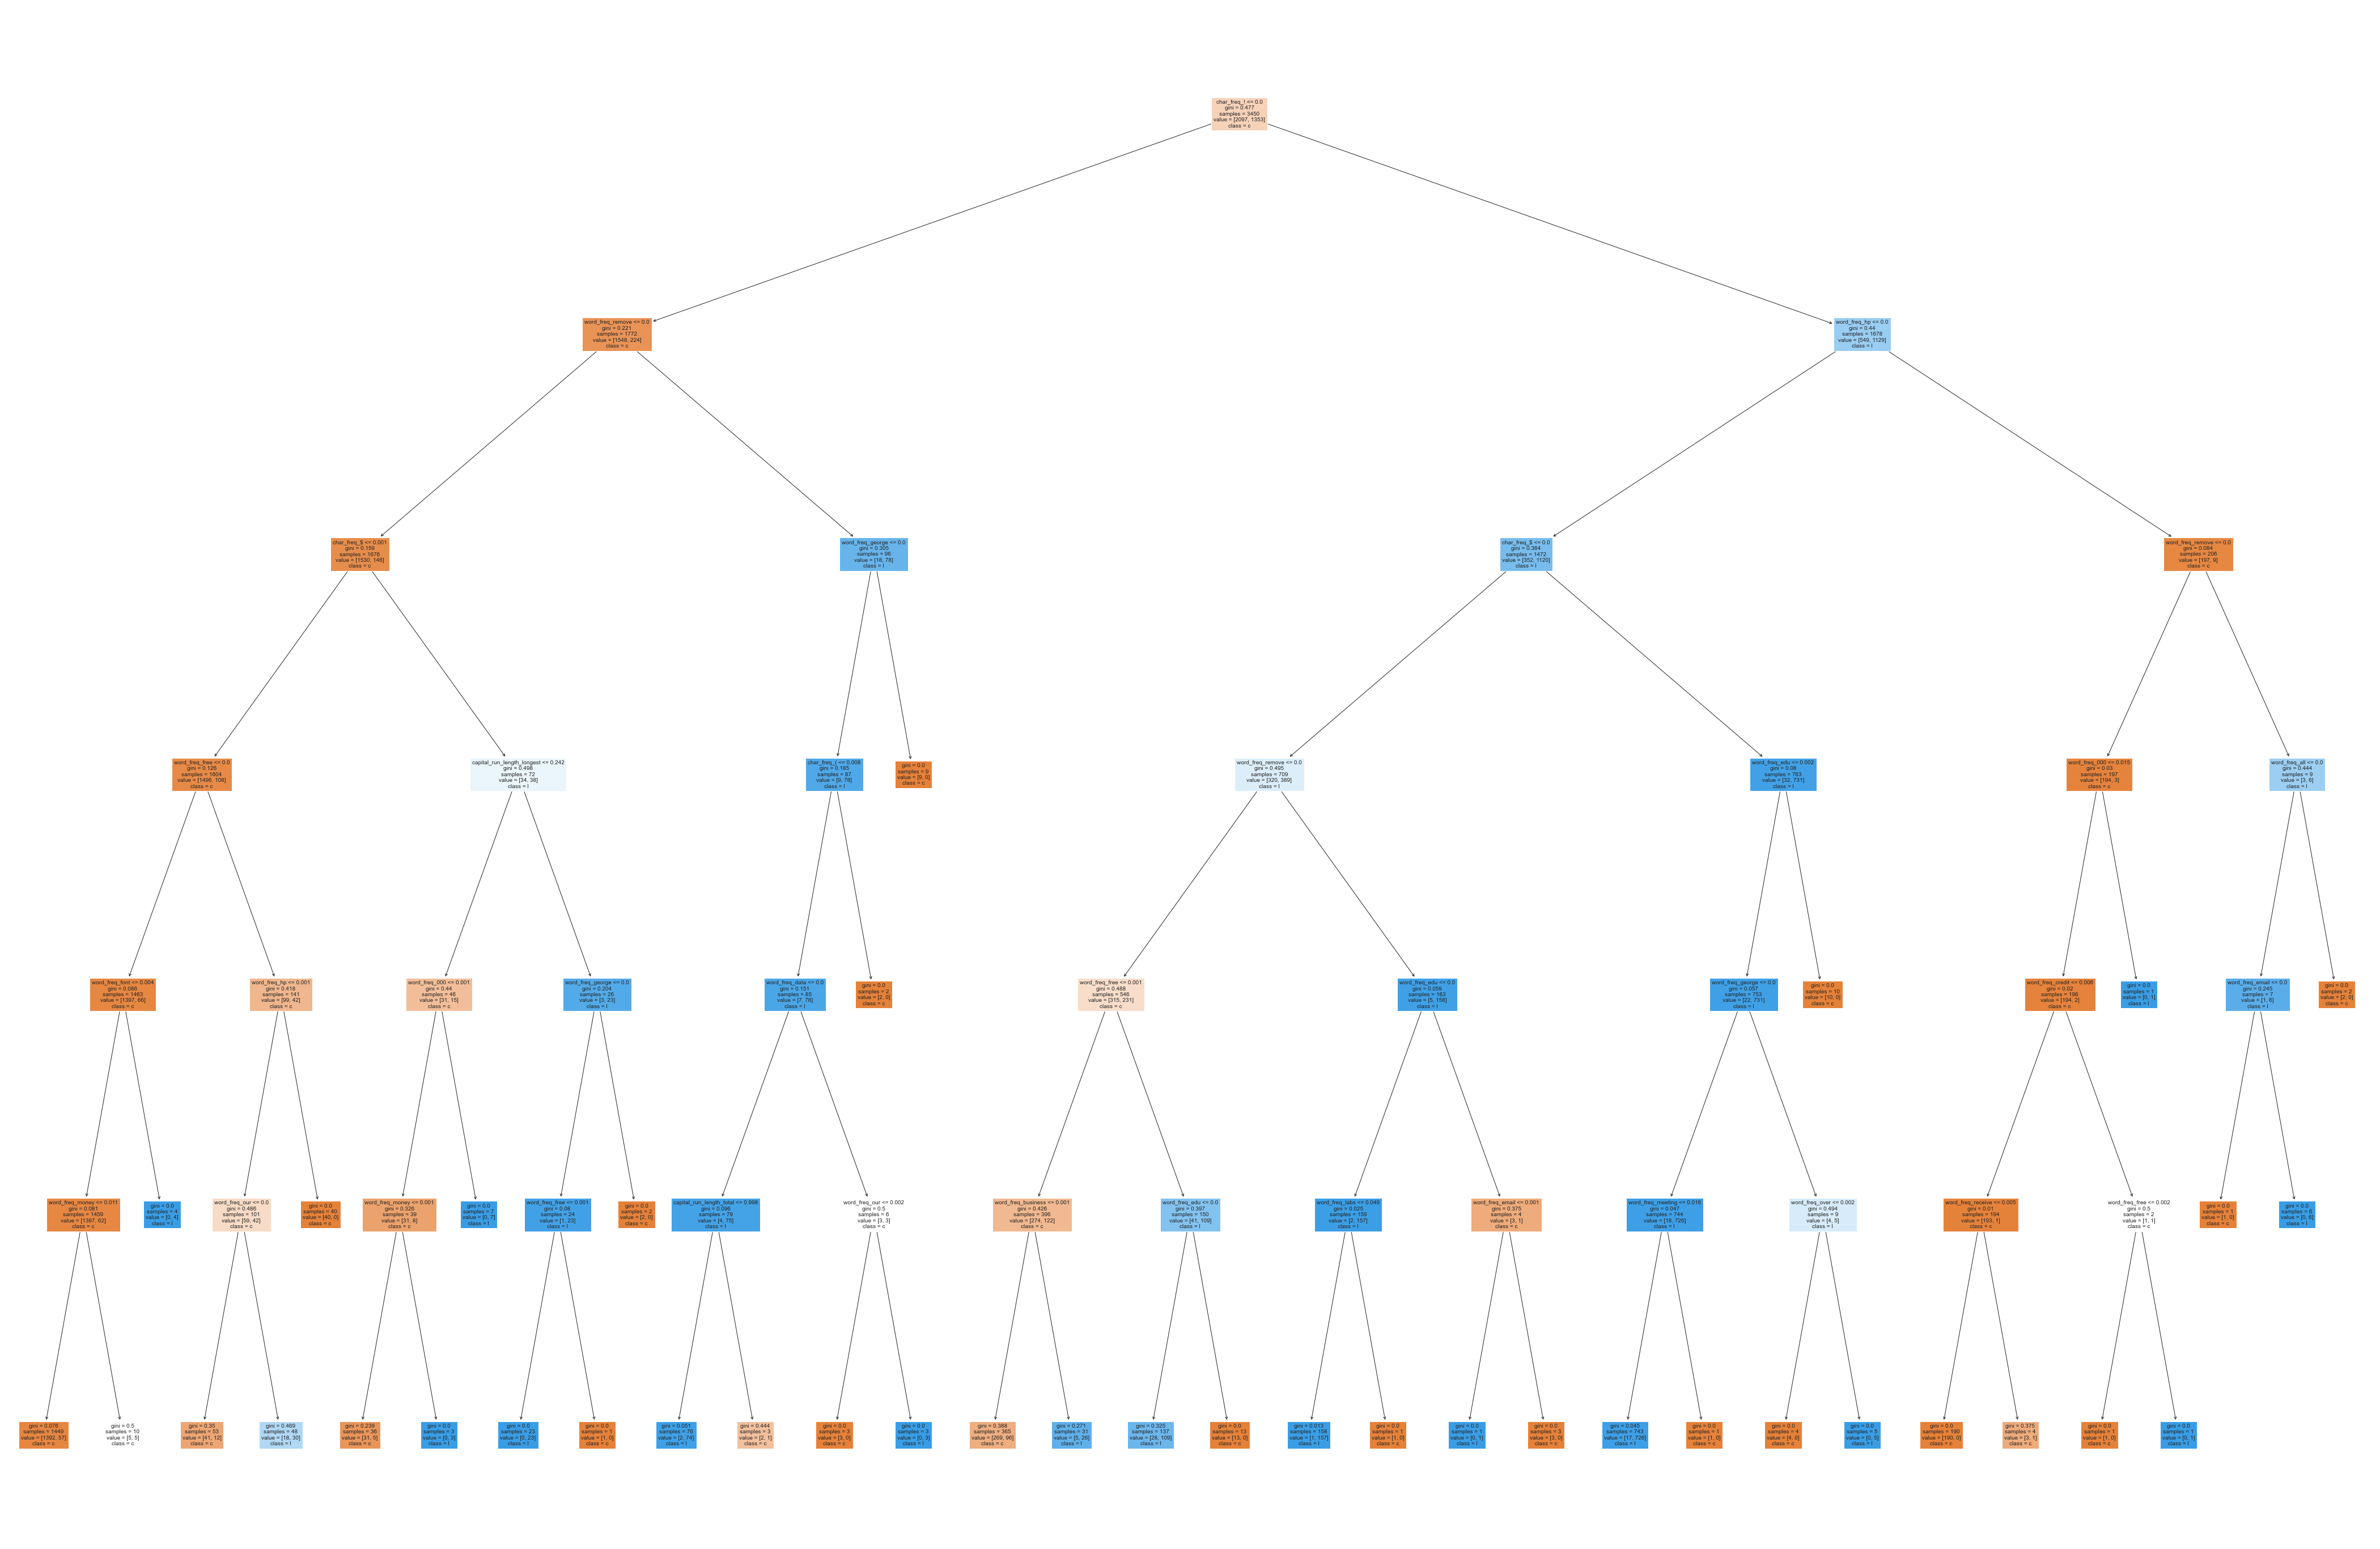

In [441]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 6)
decision_tree = decision_tree.fit(X_train, y_train)
plt.figure(figsize=(75,50))
tree.plot_tree(decision_tree, fontsize = 10, feature_names=X_test.columns, class_names=df.columns[-1], filled=True)
plt.savefig('tree.png', dpi=100)

In [442]:
y_pred = decision_tree.predict(X_test)
print(f'Acuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Classification Report: \n', classification_report(y_test, y_pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Acuracy: 90.70%
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       691
           1       0.93      0.83      0.88       460

    accuracy                           0.91      1151
   macro avg       0.91      0.89      0.90      1151
weighted avg       0.91      0.91      0.91      1151

Confusion Matrix: 
 [[663  28]
 [ 79 381]]


# SVM

In [458]:
SVM = SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

print(f'Acuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Classification Report: \n', classification_report(y_test, y_pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Acuracy: 70.03%
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.87      0.78       691
           1       0.69      0.45      0.55       460

    accuracy                           0.70      1151
   macro avg       0.70      0.66      0.66      1151
weighted avg       0.70      0.70      0.68      1151

Confusion Matrix: 
 [[599  92]
 [253 207]]


In [444]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000], 
              'gamma': [10, 1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']}
grid_SVM = GridSearchCV(SVC(), param_grid, refit=True)
grid_SVM.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [445]:
grid_SVM.best_params_

{'C': 100000, 'gamma': 1, 'kernel': 'rbf'}

In [446]:
y_pred = grid_SVM.predict(X_test)
print(f'Acuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Classification Report: \n', classification_report(y_test, y_pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Acuracy: 91.14%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       691
           1       0.87      0.91      0.89       460

    accuracy                           0.91      1151
   macro avg       0.91      0.91      0.91      1151
weighted avg       0.91      0.91      0.91      1151

Confusion Matrix: 
 [[629  62]
 [ 40 420]]


# Random Forest 

In [447]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print(f'Acuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Classification Report: \n', classification_report(y_test, y_pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Acuracy: 93.83%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       691
           1       0.96      0.88      0.92       460

    accuracy                           0.94      1151
   macro avg       0.94      0.93      0.93      1151
weighted avg       0.94      0.94      0.94      1151

Confusion Matrix: 
 [[673  18]
 [ 53 407]]


In [448]:
param_grid = { 
    'max_features': [10, 20, 30],
    'max_depth' : [20, 30, 40, 50]
}
grid_RF = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
grid_RF.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 40, 50],
                         'max_features': [10, 20, 30]})

In [449]:
grid_RF.best_params_

{'max_depth': 30, 'max_features': 10}

In [450]:
y_pred = grid_RF.predict(X_test)
print(f'Acuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Classification Report: \n', classification_report(y_test, y_pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Acuracy: 94.09%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       691
           1       0.96      0.89      0.92       460

    accuracy                           0.94      1151
   macro avg       0.94      0.93      0.94      1151
weighted avg       0.94      0.94      0.94      1151

Confusion Matrix: 
 [[672  19]
 [ 49 411]]


# AdaBoost

In [451]:
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)
y_pred = ADA.predict(X_test)

print(f'Acuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Classification Report: \n', classification_report(y_test, y_pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Acuracy: 90.88%
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       691
           1       0.90      0.86      0.88       460

    accuracy                           0.91      1151
   macro avg       0.91      0.90      0.90      1151
weighted avg       0.91      0.91      0.91      1151

Confusion Matrix: 
 [[649  42]
 [ 63 397]]


In [452]:
param_grid = { 
    'n_estimators': [100, 300, 500],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
}
grid_ADA = GridSearchCV(AdaBoostClassifier(), param_grid, refit=True)
grid_ADA.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 300, 500]})

In [453]:
grid_ADA.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [454]:
y_pred = grid_ADA.predict(X_test)
print(f'Acuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Classification Report: \n', classification_report(y_test, y_pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Acuracy: 91.75%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       691
           1       0.91      0.88      0.90       460

    accuracy                           0.92      1151
   macro avg       0.92      0.91      0.91      1151
weighted avg       0.92      0.92      0.92      1151

Confusion Matrix: 
 [[650  41]
 [ 54 406]]
